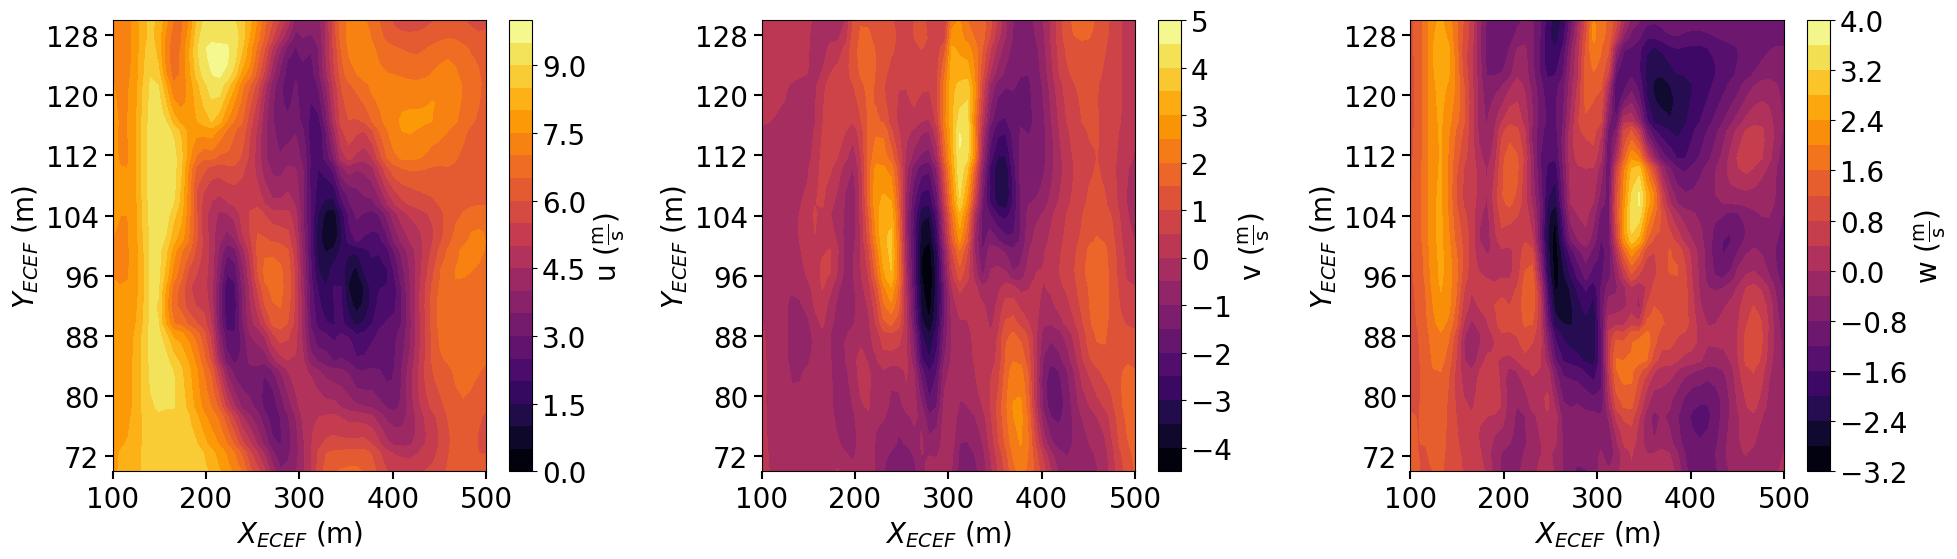

In [2]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Define the grid of positions
x_positions = np.linspace(100, 500, 50)
y_positions = np.linspace(70, 130, 50)
z_height = 50  # Reference z-height for data extraction

# Initialize arrays to store components
X, Y = np.meshgrid(x_positions, y_positions)
u_values = np.zeros_like(X)
v_values = np.zeros_like(X)
w_values = np.zeros_like(X)

# Read both meshes
mesh_bp = pv.read(r"C:\Users\KU5001153\Downloads\bp_50percent_75.vtk")
mesh_wind = pv.read(r"C:\Users\KU5001153\Downloads\wind_data_mean.vtk")

# In your extraction loop, modify to add values:
for i, x_pos in enumerate(x_positions):
    slice_x_bp = mesh_bp.slice(normal='x', origin=(x_pos, 0, 0))
    slice_x_wind = mesh_wind.slice(normal='x', origin=(x_pos, 0, 0))
    
    clipped_slice_bp = slice_x_bp.clip(normal=[-1, 0, 0], origin=[0, 0, 0])
    clipped_slice_wind = slice_x_wind.clip(normal=[-1, 0, 0], origin=[0, 0, 0])
    
    for j, y_pos in enumerate(y_positions):
        points_bp = clipped_slice_bp.points
        points_wind = clipped_slice_wind.points
        
        u_bp = clipped_slice_bp.get_array('U')
        u_wind = clipped_slice_wind.get_array('UMean')
        
        # Find closest points in both datasets
        distances_bp = np.sqrt((points_bp[:, 1] - y_pos)**2 + (points_bp[:, 2] - z_height)**2)
        distances_wind = np.sqrt((points_wind[:, 1] - y_pos)**2 + (points_wind[:, 2] - z_height)**2)
        
        closest_point_idx_bp = np.argmin(distances_bp)
        closest_point_idx_wind = np.argmin(distances_wind)
        
        # # Sum the velocities
        # u_values[j, i] = u_bp[closest_point_idx_bp, 0] + u_wind[closest_point_idx_wind, 0]
        # v_values[j, i] = u_bp[closest_point_idx_bp, 1] + u_wind[closest_point_idx_wind, 1]
        # w_values[j, i] = u_bp[closest_point_idx_bp, 2] + u_wind[closest_point_idx_wind, 2]

        # Sum the velocities
        u_values[j, i] = u_bp[closest_point_idx_bp, 0] 
        v_values[j, i] = u_bp[closest_point_idx_bp, 1] 
        w_values[j, i] = u_bp[closest_point_idx_bp, 2] 

# Increase font sizes globally
plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 20, 
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
})


# Create top view contour plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Increase tick parameters
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', which='major', length=6, width=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))

# Plot u component
contour1 = ax1.contourf(X, Y, u_values, levels=20, cmap='inferno')
ax1.set_xlabel(r'$X_{ECEF}$ (m)')
ax1.set_ylabel(r'$Y_{ECEF}$ (m)')
plt.colorbar(contour1, ax=ax1, label=r'u $(\mathrm{\frac{m}{s}})$')

ax1.xaxis.set_major_locator(plt.LinearLocator(5))  
ax2.xaxis.set_major_locator(plt.LinearLocator(5))
ax3.xaxis.set_major_locator(plt.LinearLocator(5))

# Plot v component
contour2 = ax2.contourf(X, Y, v_values, levels=20, cmap='inferno')
ax2.set_xlabel(r'$X_{ECEF}$ (m)')
ax2.set_ylabel(r'$Y_{ECEF}$ (m)')
plt.colorbar(contour2, ax=ax2, label=r'v $(\mathrm{\frac{m}{s}})$')

# Plot w component
contour3 = ax3.contourf(X, Y, w_values, levels=20, cmap='inferno')
ax3.set_xlabel(r'$X_{ECEF}$ (m)')
ax3.set_ylabel(r'$Y_{ECEF}$ (m)')
plt.colorbar(contour3, ax=ax3, label=r'w $(\mathrm{\frac{m}{s}})$')

plt.tight_layout()
plt.show()
